<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/GMM_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
dat=read.csv("encoded_features.csv")


Now that we read original data with the features from the variational autoencoders and the PCA scores, we have to find a reasonable subset of institutions that we can reliably call HSIs. I used the hsi_code having levels 5 or 6

In [3]:
colnames(dat)

table(dat$hsi_code)
dat.hsi=dat[dat$hsi_code %in% c("5","5.0","5R","6","6.0")|dat$excellencia_hsi_status=="HSI",]
#dat.hsi=dat.hsi[dat.hsi$excellencia_hsi_status_x!="",]
dim(dat);dim(dat.hsi)
table(dat$DoE,dat$hsi_code)
table(dat$excellencia_hsi_status,dat$hsi_code)


#df_onehot = extracted_columns = dat.hsi[, c(507:516)+1]

#df_pca = extracted_columns = dat.hsi[, c(517:526)+1]

#head(df_onehot)
#head(df_pca)

[1] "Unnamed..0"                              
   [2] "unitid"                                  
   [3] "year"                                    
   [4] "row_number"                              
   [5] "inst_name"                               
   [6] "longitude"                               
   [7] "latitude"                                
   [8] "address"                                 
   [9] "state_abbr"                              
  [10] "zip"                                     
  [11] "phone_number"                            
  [12] "city"                                    
  [13] "county_name"                             
  [14] "offering_highest_level"                  
  [15] "region"                                  
  [16] "inst_control"                            
  [17] "institution_level.x"                     
  [18] "sector"                                  
  [19] "chief_admin_name"                        
  [20] "chief_admin_title"                       
  [21] "hbcu"                                    
  [22] "primarily_postsecondary"                 
  [23] "hospital"                                
  [24] "medical_degree"                          
  [25] "tribal_college"                          
  [26] "ein"                                     
  [27] "urban_centric_locale"                    
  [28] "opeid"                                   
  [29] "offering_highest_degree"                 
  [30] "currently_active_ipeds"                  
  [31] "date_closed"                             
  [32] "duns"                                    
  [33] "title_iv_indicator"                      
  [34] "offering_undergrad"                      
  [35] "offering_grad"                           
  [36] "inst_status"                             
  [37] "newid"                                   
  [38] "year_deleted"                            
  [39] "url_school"                              
  [40] "degree_granting"                         
  [41] "open_public"                             
  [42] "postsec_public_active"                   
  [43] "postsec_public_active_title_iv"          
  [44] "inst_system_flag"                        
  [45] "inst_system_name"                        
  [46] "reporting_method"                        
  [47] "inst_category"                           
  [48] "land_grant"                              
  [49] "inst_size"                               
  [50] "inst_alias"                              
  [51] "url_fin_aid"                             
  [52] "url_application"                         
  [53] "cbsa"                                    
  [54] "cbsa_type"                               
  [55] "csa"                                     
  [56] "necta"                                   
  [57] "comparison_group"                        
  [58] "county_fips"                             
  [59] "congress_district_id"                    
  [60] "cc_basic_2010"                           
  [61] "cc_instruc_undergrad_2010"               
  [62] "cc_instruc_grad_2010"                    
  [63] "cc_undergrad_2010"                       
  [64] "cc_enroll_2010"                          
  [65] "cc_size_setting_2010"                    
  [66] "cc_basic_2000"                           
  [67] "url_netprice"                            
  [68] "comparison_group_custom"                 
  [69] "url_veterans"                            
  [70] "url_athletes"                            
  [71] "cc_basic_2015"                           
  [72] "cc_instruc_undergrad_2015"               
  [73] "cc_instruc_grad_2015"                    
  [74] "cc_undergrad_2015"                       
  [75] "cc_enroll_2015"                          
  [76] "cc_basic_2018"                           
  [77] "cc_instruc_undergrad_2018"               
  [78] "cc_instruc_grad_2018"                    
  [79] "cc_undergrad_2018"                       
  [80] "cc_enroll_2018"                          
  [


        0.0     1   1.0     2   2.0     3   3.0     4   4.0    4R     5   5.0 
23395     5   667 10010   149  1535   128  1706    15   262    17   151  1015 
   5R     6   6.0 
   22   134   735 

[1] 39946  3831

[1] 2147 3831

              
                       0.0     1   1.0     2   2.0     3   3.0     4   4.0
               23395     5   525  7947   115  1211   101  1362    11   212
  Emerging HSI     0     0     0     0     0     0     0     0     4    50
  HSI              0     0     0     0     0     0     0     0     0     0
  Non-HSI          0     0   142  2063    34   324    27   344     0     0
              
                  4R     5   5.0    5R     6   6.0
                   0   125   859     0   110   599
  Emerging HSI    17     0     0     0     0     0
  HSI              0    26   156    22    24   136
  Non-HSI          0     0     0     0     0     0

              
                       0.0     1   1.0     2   2.0     3   3.0     4   4.0
               23395     0   139  2054   106  1203    28   404     3    71
  Emerging HSI     0     0     2    36     2     5     7    49     6   102
  HSI              0     5     0     4     0     9     5    21     3    40
  Not HSI          0     0   526  7916    41   318    88  1232     3    49
              
                  4R     5   5.0    5R     6   6.0
                   3    30   237     5    33   182
  Emerging HSI     3    35   354     4    45   256
  HSI              3    71   264     8    41   265
  Not HSI          8    15   160     5    15    32

In [4]:
rbind(names(dat.hsi)[grep("exp",names(dat.hsi),ignore.case = TRUE)],grep("exp",names(dat.hsi),ignore.case = TRUE))


sch_exp_net_fellowships,exp_instruc_total,exp_instruc_salaries,exp_research_total,exp_research_salaries,exp_pub_serv_total,exp_pub_serv_salaries,exp_res_pub_serv_total,exp_res_pub_serv_salaries,exp_acad_supp_total,⋯,exp_preservation_services,exp_other_operation_maint,exp_total_operation_maint,exp_total,exp_total_wo_fringe_benefit,lib_exp_greater_100k,INEXPFTE,OTHEREXPENSE_ON,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM
135,136,137,138,139,140,141,142,143,144,⋯,375,376,377,378,379,384,888,2891,2893,2894


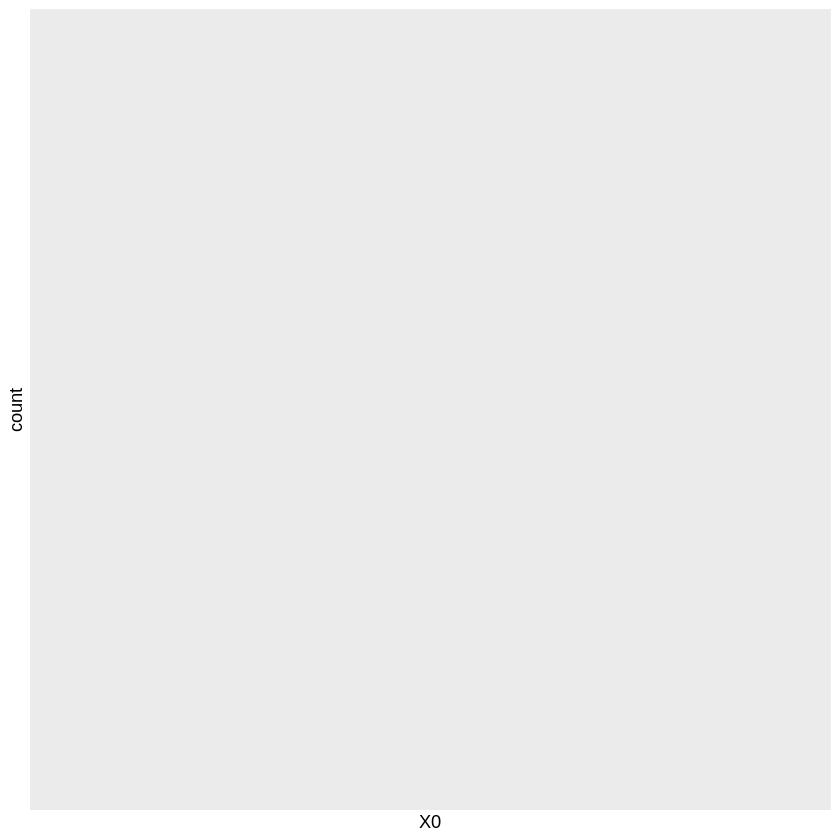

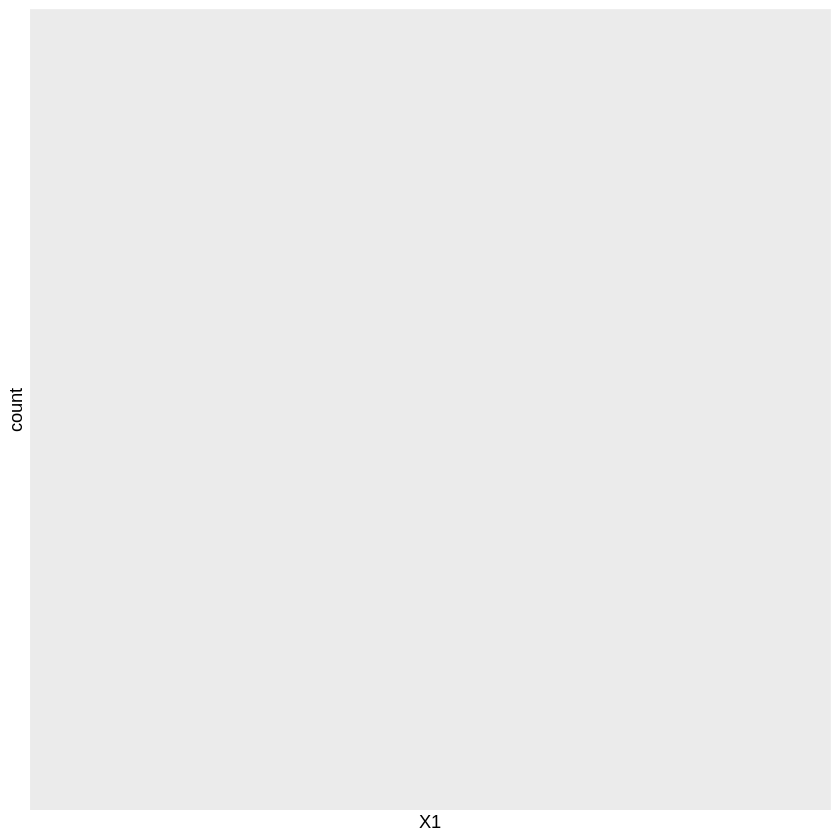

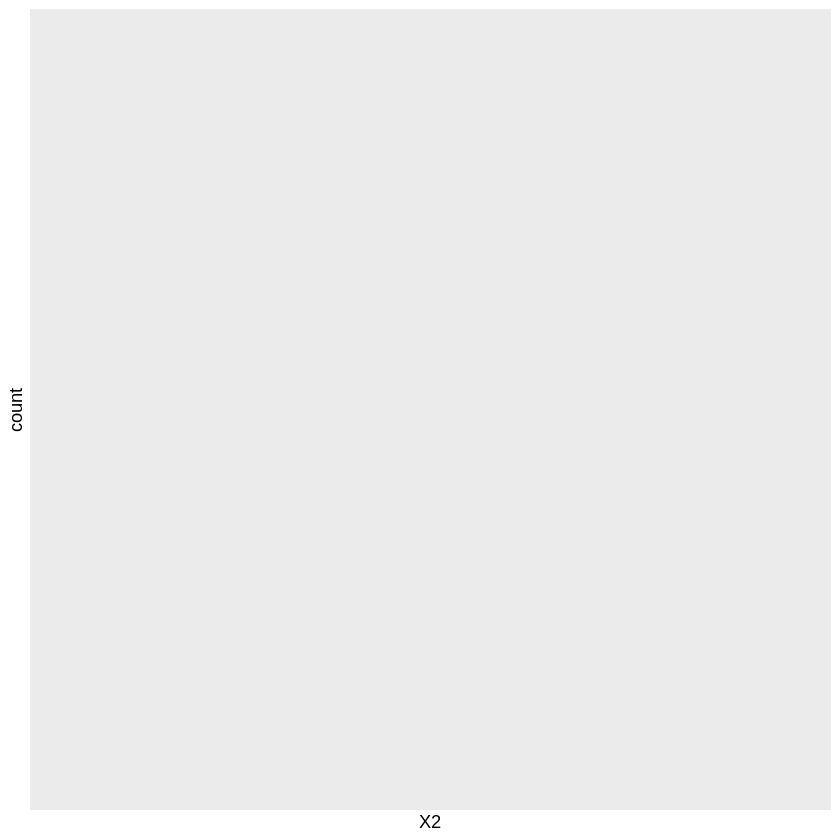

In [5]:
library(ggplot2)


ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X0,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X1,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X2,color=DoE))+
  geom_histogram(fill="white",bins=10)

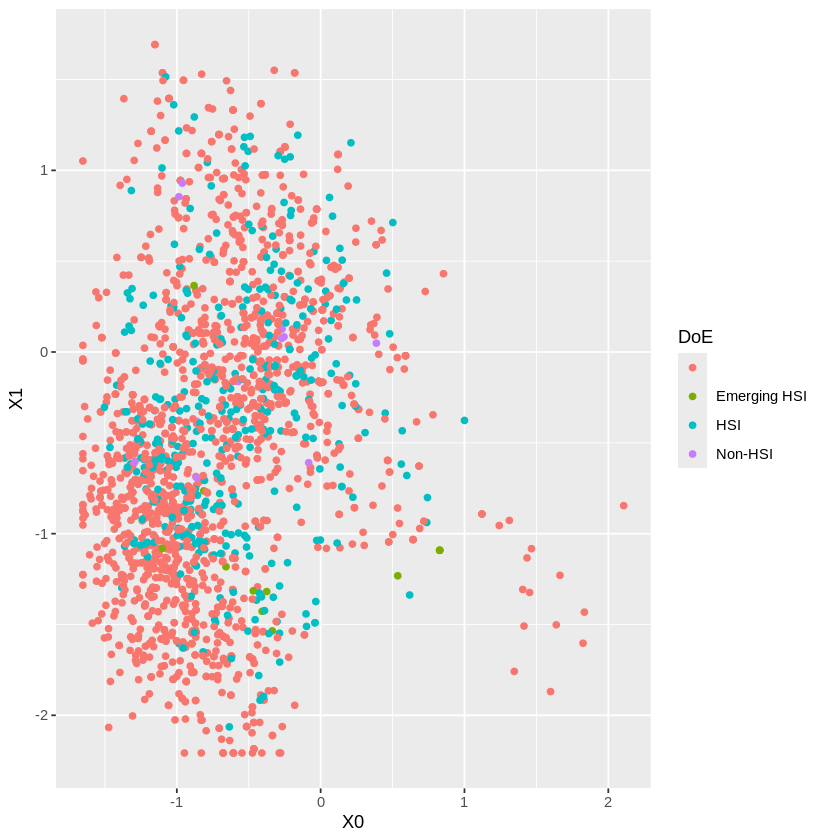

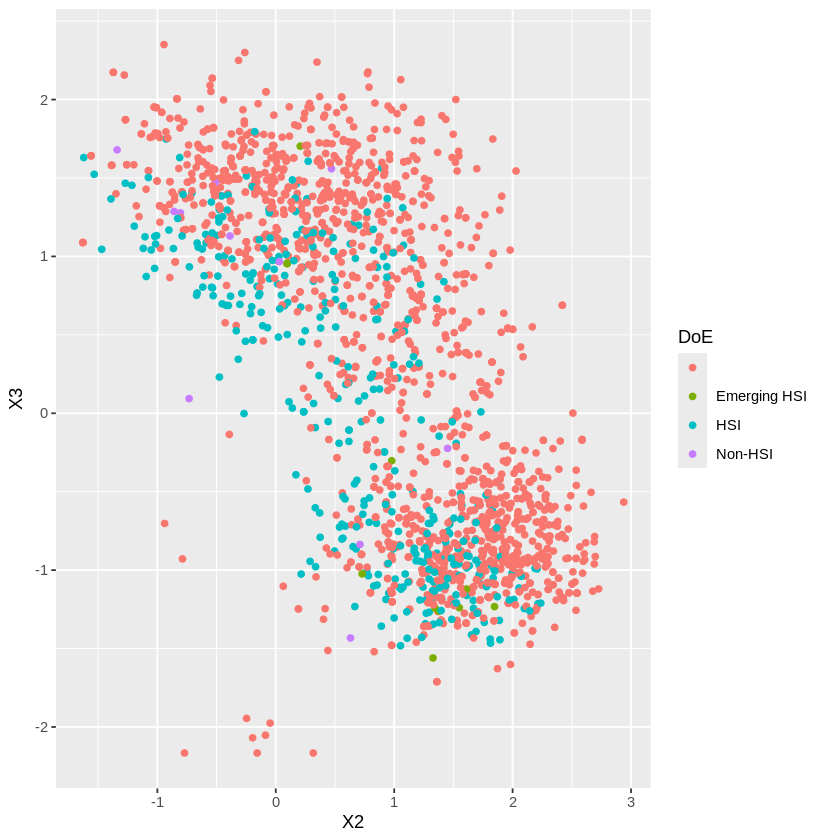

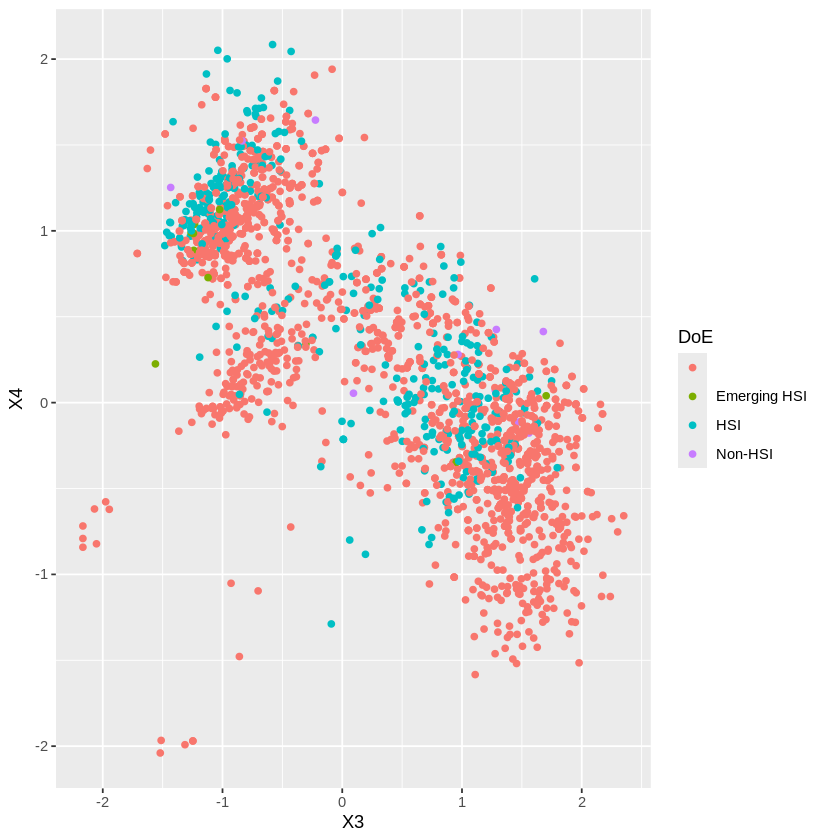

In [6]:
ggplot(dat.hsi,aes(x=X0,y=X1,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X2,y=X3,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X3,y=X4,color=DoE))+
  geom_point()

In [7]:
install.packages("flexmix")
library(flexmix)
#

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘modeltools’


Loading required package: lattice



,unitid,year,X0,X1,X2,X3
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
460,104160,2017,-1.3206791,-0.6159009,0.7821183,-1.0357394
477,104346,2017,-1.0673298,-0.8883344,1.3045960,-0.7024030
490,104425,2017,-0.8636917,-1.1779798,1.2894990,-0.7021221
533,104708,2017,-0.4116668,-1.3479743,1.9955362,-1.0183691
552,105145,2017,-1.4178656,-0.1828208,0.7691524,-1.0056912
602,105428,2017,-0.7978962,-0.2683539,1.6001744,-0.9063826


3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *
3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


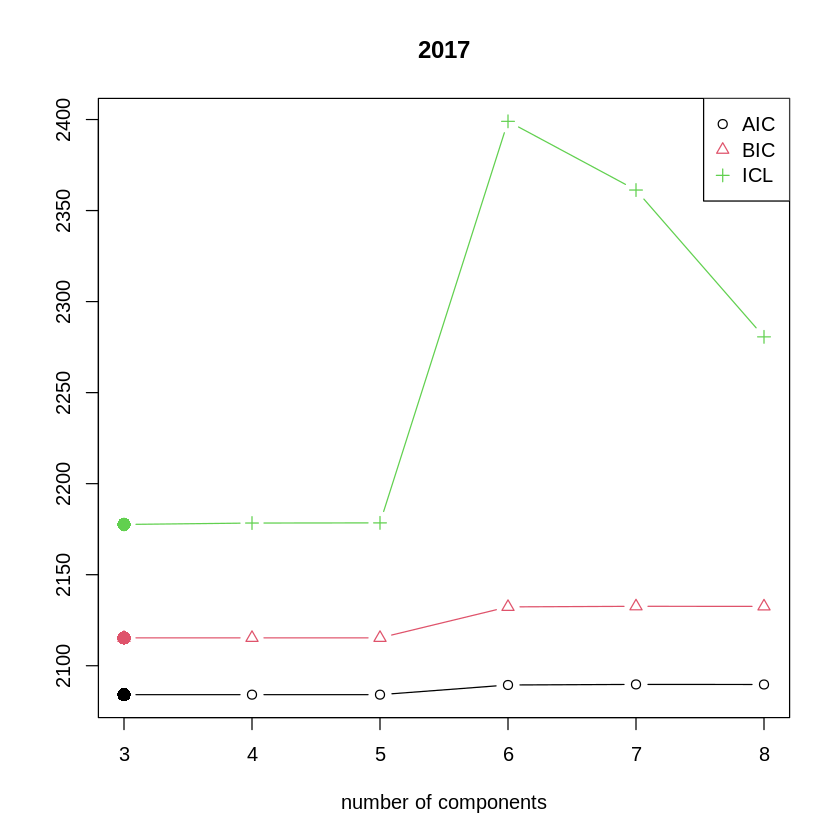

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


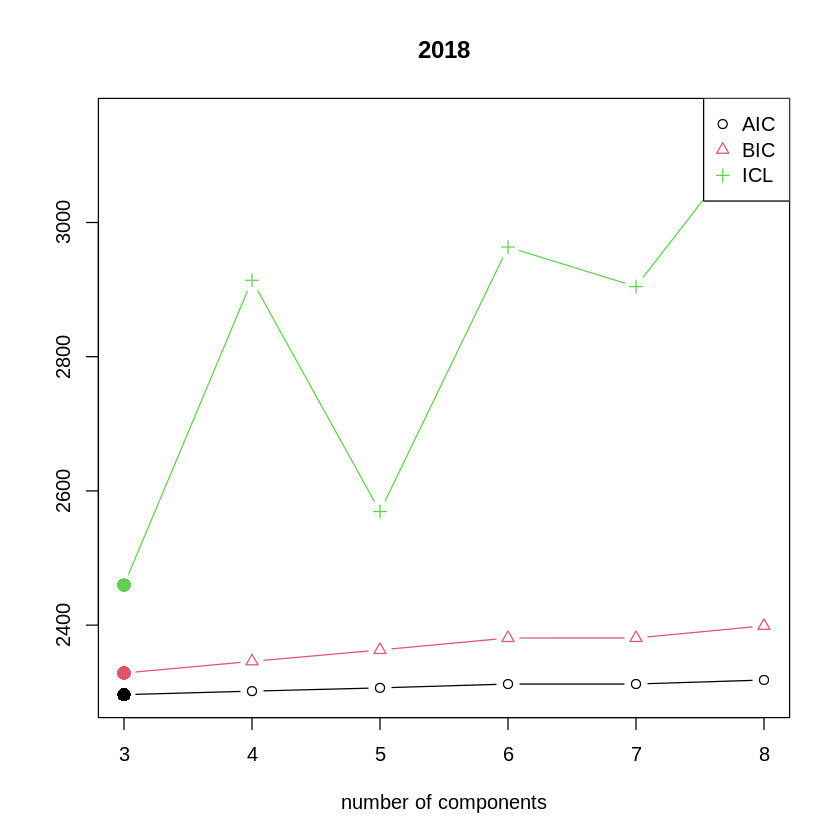

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


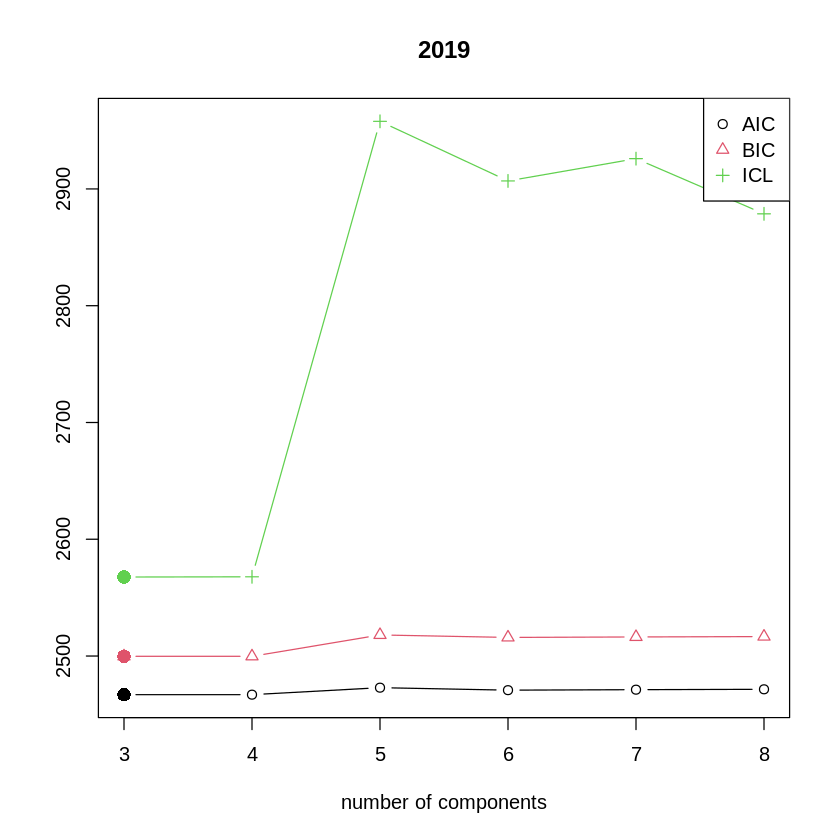

3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *
8 : * * *


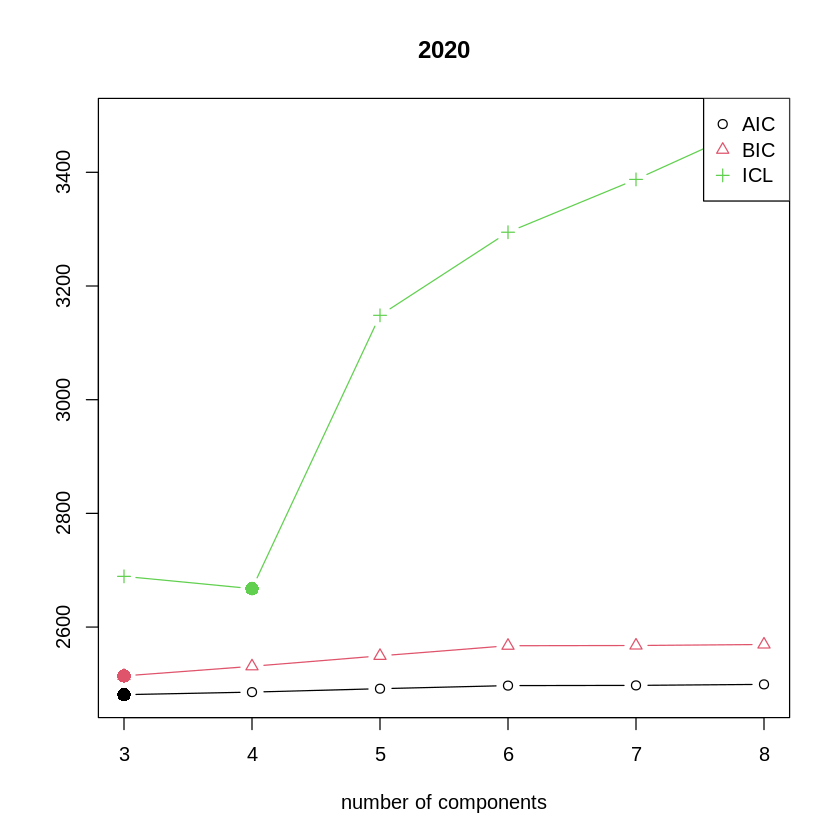

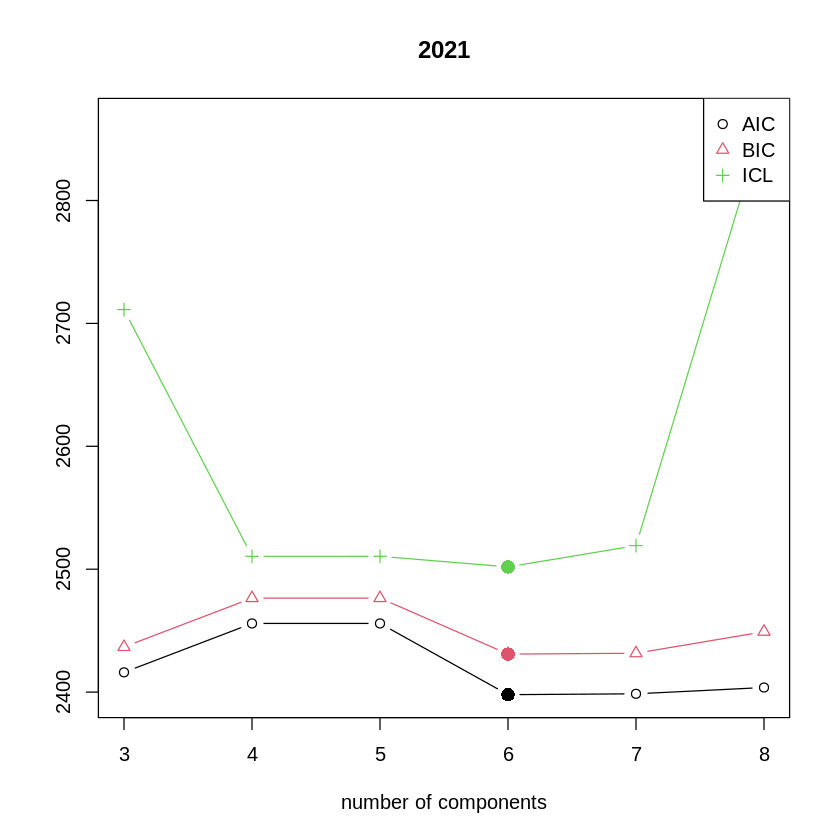

In [8]:

# Fit a GMM with 2 latent classes and linear growth trajectories
# The FLXMRglm driver is used for standard linear models within each class.
# The formula specifies the growth model.
# k specifies the number of latent classes.
# cluster is used to group observations by individual for longitudinal data.
#model_gmm <- flexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid, data = dat.hsi, k = 2, model = FLXMRglm())
#summary(model_gmm)
# You can also try different numbers of classes and compare models using BIC or ICL:

#ex2 <- initFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid,data = dat.hsi, k = 2:5, model = FLXMCmvnorm(diagonal = FALSE),
#                   control = list(minprior = 0), nrep = 2)
#ex2
#plot(ex2)

head(dat.hsi[dat.hsi$year=="2017",c("unitid","year","X0","X1","X2","X3")])

set.seed(32335)
gmm2017 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2017",], k = 3:8, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2018",], k = 3:8, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2019",], k = 3:8, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2020",], k = 3:8, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

gmm2021 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+pca_1+pca_2+pca_3+pca_4+pca_5+pca_6+pca_7+pca_8+pca_9+pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year=="2021",], k = 3:8, model = FLXMRglm())
plot(gmm2021,main="2021") # Visualize BIC/ICL values


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2017", ], model = FLXMRglm(), k = 5)

        prior size post>0  ratio
Comp.1 0.7536  287    363 0.7906
Comp.2 0.0642   11    365 0.0301
Comp.3 0.1821   67    226 0.2965

'log Lik.' -1034.056 (df=8)
AIC: 2084.112   BIC: 2115.311 


,Comp.1,Comp.2,Comp.3
coef.(Intercept),-2.148463,3.041282,-9.921096
sigma,2.527844,6.973744,2.073486


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 3 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1
[186] 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1
[223] 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 3 3 3 1 3 3 3 3 3 3 3 3 2 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3
[297] 3 3 1 3 1 3 3 1 2 3 3 1 3 2 3 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3
[334] 3 3 3 3 3 1 3 1 3 1 1 3 1 1 1 1 3 3 3 1 1 1 3 1 1 3 1 1 1 1 1 1

[1]  365 3831

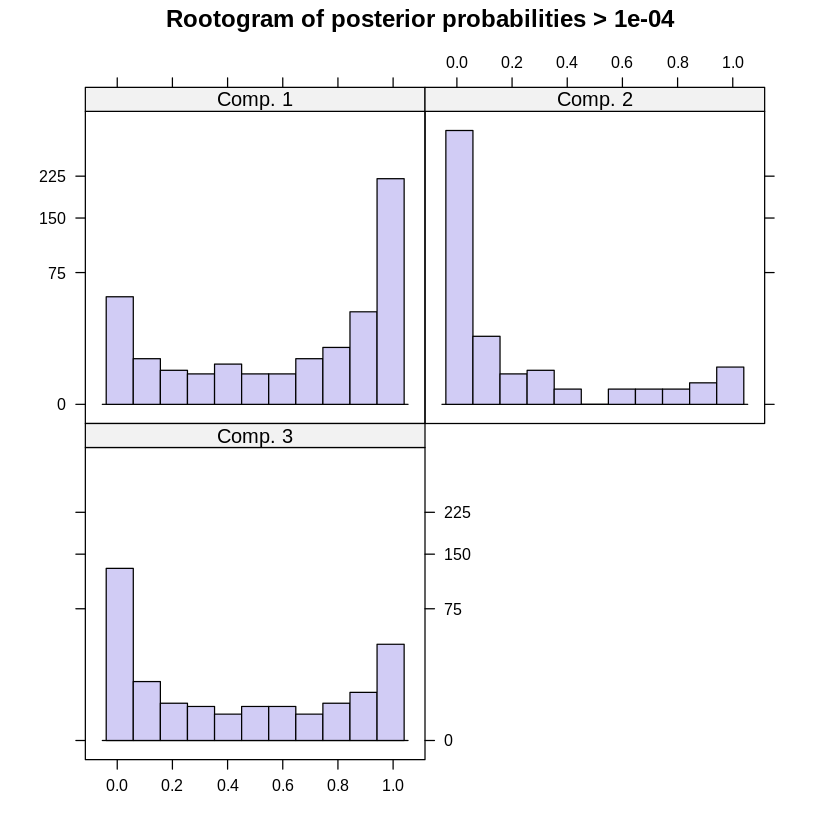

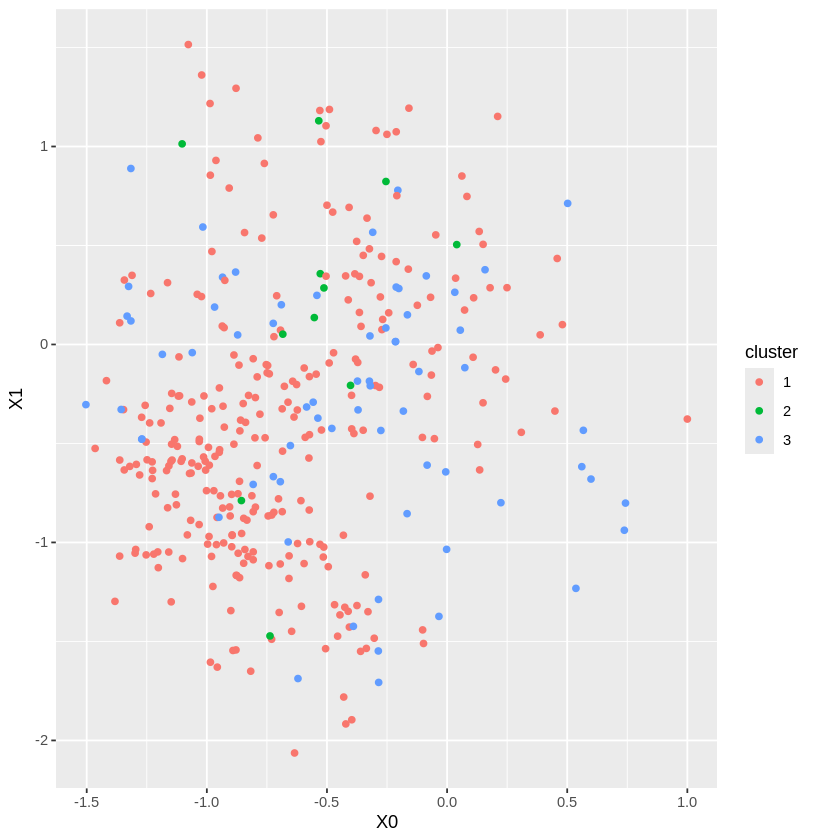

In [9]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2017.3 <- getModel(gmm2017, which =3)
summary(gmm2017.3)
parameters(gmm2017.3)
clusters(gmm2017.3)
# Plot the extracted model
plot(gmm2017.3)

dat17=dat.hsi[dat.hsi$year=="2017",]
dim(dat17)
dat17$cluster=as.character(clusters(gmm2017.3))

ggplot(dat17,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2018", ], model = FLXMRglm(), k = 5)

        prior size post>0   ratio
Comp.1 0.7009  340    415 0.81928
Comp.2 0.0596   13    418 0.03110
Comp.3 0.0825    4    418 0.00957
Comp.4 0.0675    0    418 0.00000
Comp.5 0.0895   61    155 0.39355

'log Lik.' -1139.248 (df=14)
AIC: 2306.496   BIC: 2362.993 


[1]  418 3831

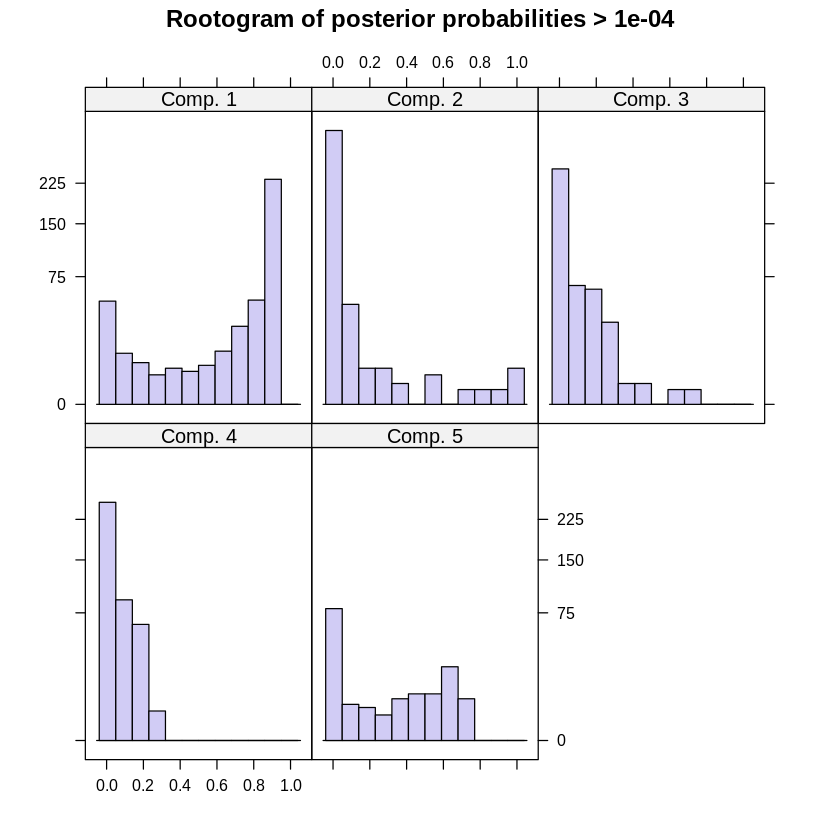

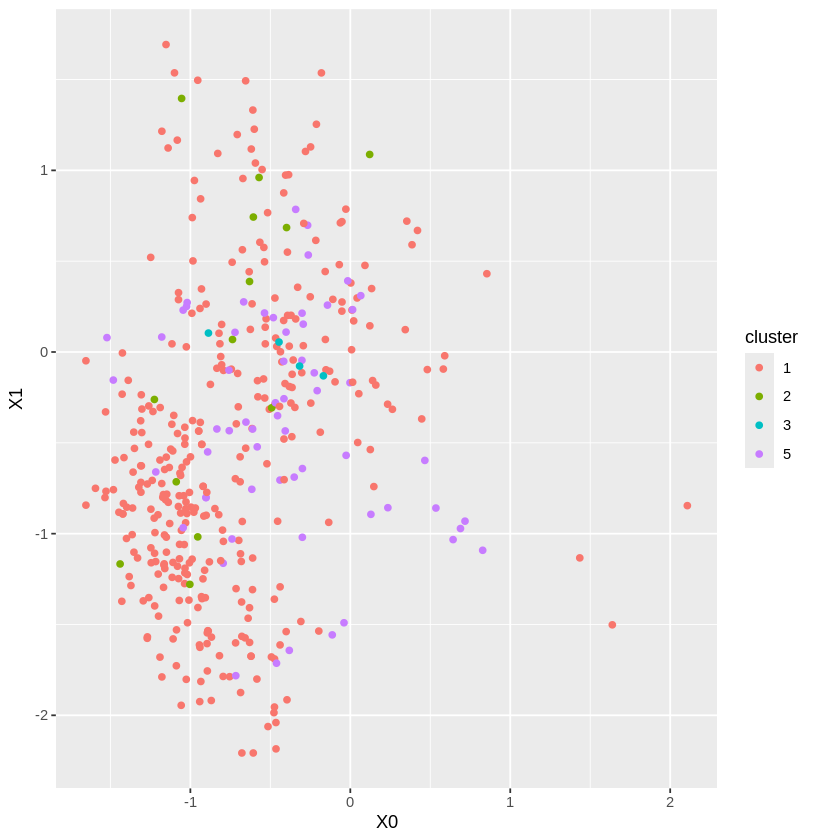

In [10]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2018.3 <- getModel(gmm2018, which =3)
summary(gmm2018.3)
# Plot the extracted model
plot(gmm2018.3)

dat18=dat.hsi[dat.hsi$year=="2018",]
dim(dat18)
dat18$cluster=as.character(clusters(gmm2018.3))

ggplot(dat18,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2019", ], model = FLXMRglm(), k = 5)

        prior size post>0  ratio
Comp.1 0.1417   72    236 0.3051
Comp.2 0.3171    0    441 0.0000
Comp.3 0.4749  359    439 0.8178
Comp.4 0.0663   17    448 0.0379

'log Lik.' -1225.445 (df=11)
AIC: 2472.889   BIC: 2518.042 


[1]  448 3831

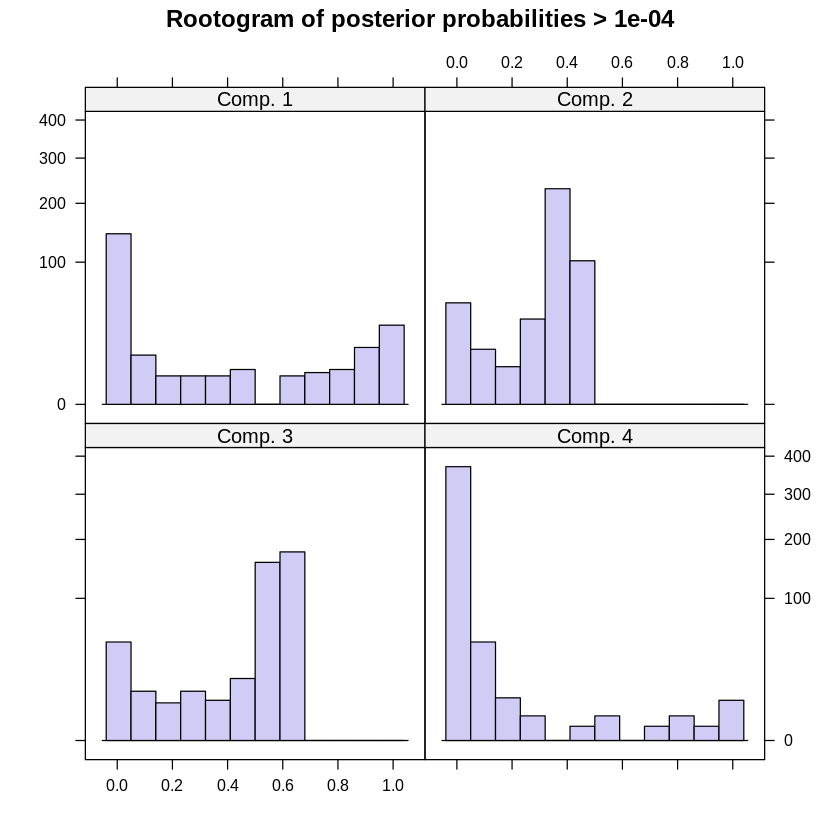

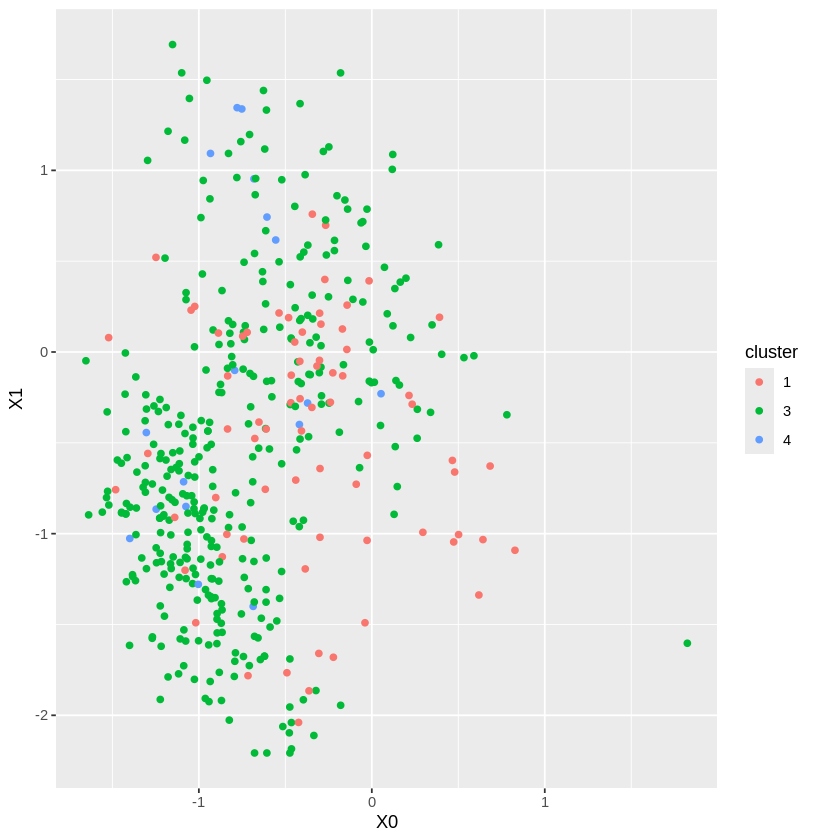

In [17]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2019.3 <- getModel(gmm2019, which =3)
summary(gmm2019.3)
# Plot the extracted model
plot(gmm2019.3)

dat19=dat.hsi[dat.hsi$year=="2019",]
dim(dat19)
dat19$cluster=as.character(clusters(gmm2019.3))

ggplot(dat19,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2020", ], model = FLXMRglm(), k = 5)

        prior size post>0  ratio
Comp.1 0.0873   51     96 0.5312
Comp.2 0.0740   13    458 0.0284
Comp.3 0.3475    0    450 0.0000
Comp.4 0.4171  375    455 0.8242
Comp.5 0.0741   19    453 0.0419

'log Lik.' -1231.79 (df=14)
AIC: 2491.581   BIC: 2549.357 


[1]  458 3831

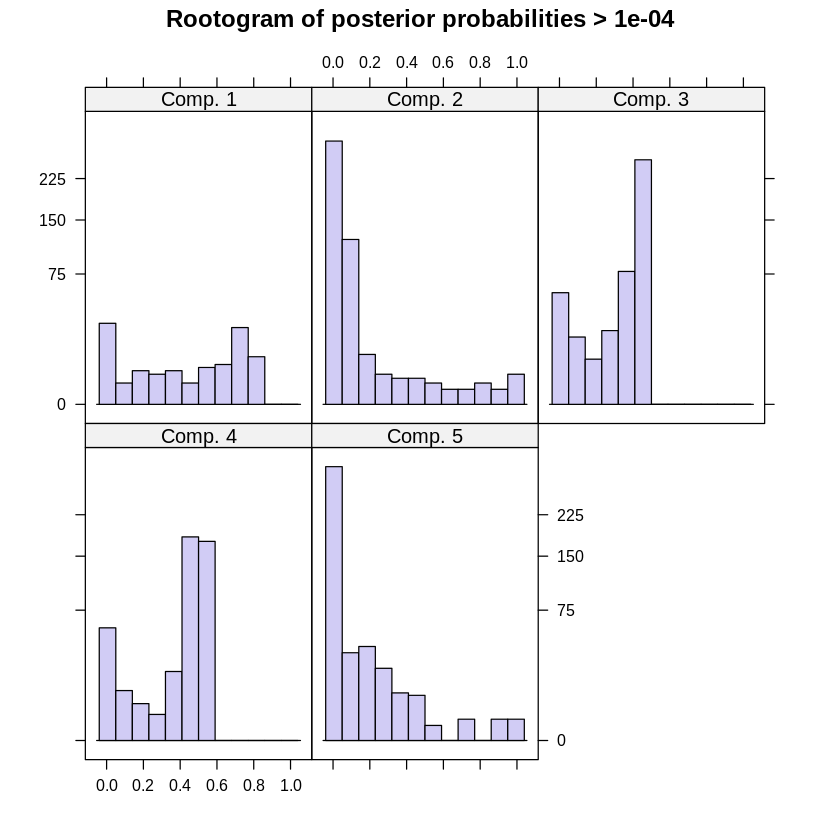

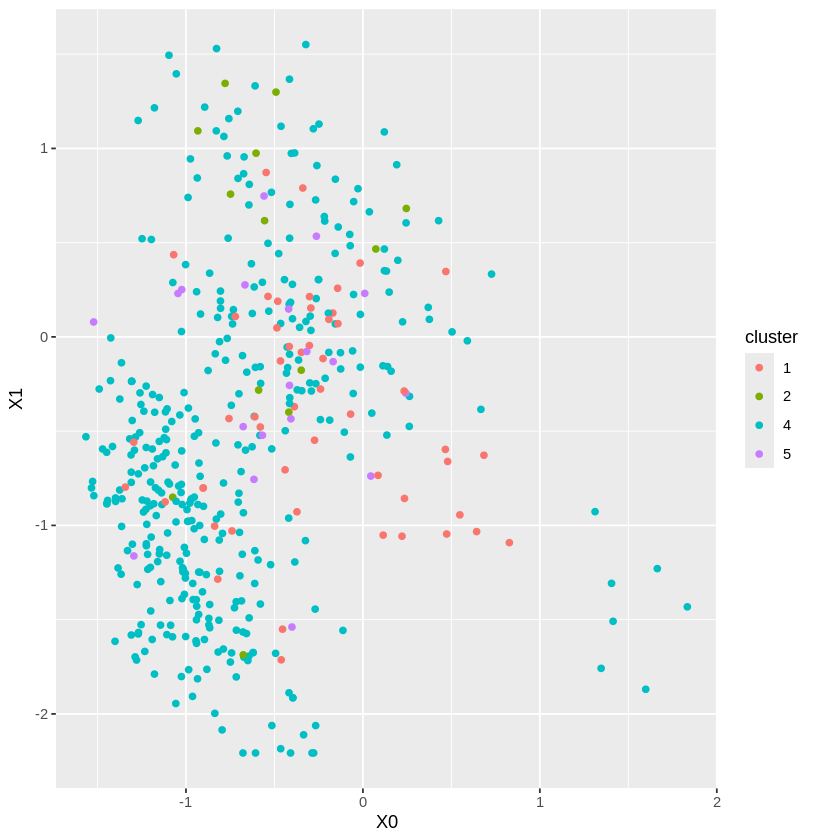

In [18]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2020.3 <- getModel(gmm2020, which =3)
summary(gmm2020.3)
# Plot the extracted model
plot(gmm2020.3)

dat20=dat.hsi[dat.hsi$year=="2020",]
dim(dat20)
dat20$cluster=as.character(clusters(gmm2020.3))

ggplot(dat20,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + 
    pca_9 + pca_10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year == 
    "2021", ], model = FLXMRglm(), k = 8)

        prior size post>0  ratio
Comp.1 0.0747   14    458 0.0306
Comp.2 0.4073  238    430 0.5535
Comp.3 0.4185  153    456 0.3355
Comp.4 0.0995   53    135 0.3926

'log Lik.' -1190.869 (df=11)
AIC: 2403.739   BIC: 2449.134 


[1]  458 3831

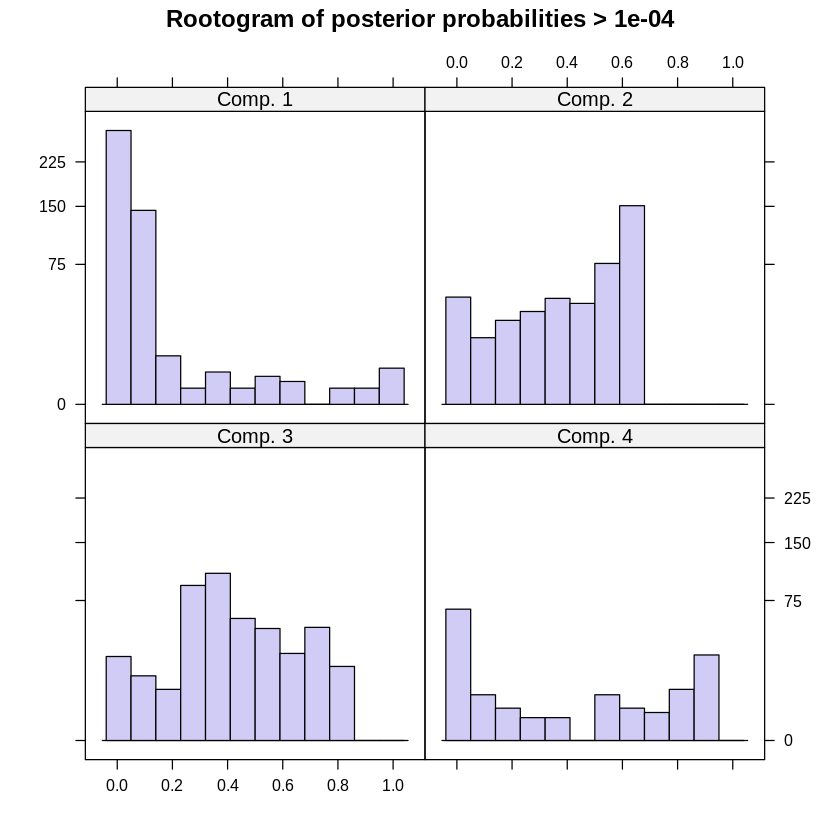

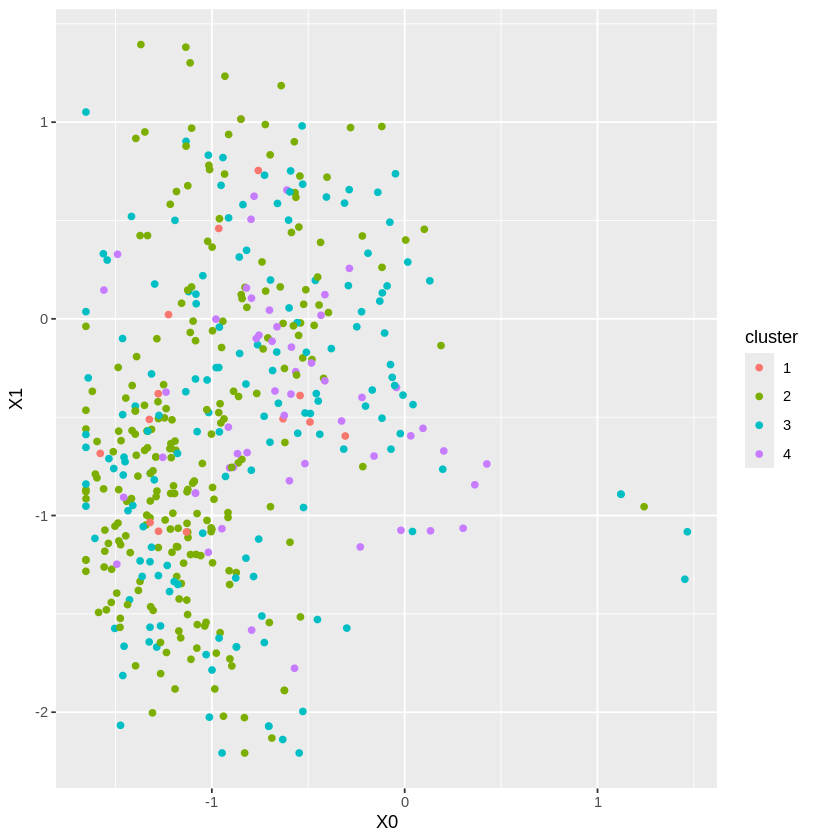

In [13]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2021.3 <- getModel(gmm2021, which =6)
summary(gmm2021.3)
# Plot the extracted model
plot(gmm2021.3)

dat21=dat.hsi[dat.hsi$year=="2021",]
dim(dat21)
dat21$cluster=as.character(clusters(gmm2021.3))

ggplot(dat21,aes(x=X0,y=X1,color=cluster))+
  geom_point()

This will rerun the GMMs but using the original non-autoencoder variables....this is part validation and part alternative mode of analysis

In [19]:
write.csv(dat17,"results17.csv")
write.csv(dat18,"results18.csv")
write.csv(dat19,"results19.csv")
write.csv(dat20,"results20.csv")
write.csv(dat21,"results21.csv")


In [15]:
#install.packages("mice")
#library(mice)
#dat.hsi2=scale(dat.hsi)
#imp=mice(dat.hsi2)
#dat.hsi3=complete(imp,"long")
#dat.hsi4=na.omit(dat.hsi3)
cbind(1:527,names(dat.hsi))
dim(dat.hsi)
set.seed(32335)



Warning message in cbind(1:527, names(dat.hsi)):
“number of rows of result is not a multiple of vector length (arg 1)”


1,Unnamed..0
2,unitid
3,year
4,row_number
5,inst_name
6,longitude
7,latitude
8,address
9,state_abbr
10,zip
11,phone_number


[1] 2147 3831

[1] 2147 3831

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
460,-1.320679,-0.6159009,0.7821183,-1.0357394,1.2673390,0.8639122,0.8548079,0.6886439,-1.4165723,-1.0884224,0.04599574,-0.1686841,-1.565962,-1.771536,-1.344816,0.9593364,0.3604229,-0.46230599,0.10468652,-0.30127292
461,-1.471126,-0.5947518,1.3027865,-0.9988670,1.1720590,0.6738903,0.4540398,1.0561510,-1.2137218,-0.8281319,0.22848084,-0.1644401,-1.548980,-1.823267,-1.104906,0.7237347,-0.5465227,-0.64417022,0.12379411,-0.14796606
462,-1.471126,-0.5947518,1.3027865,-0.9988670,1.1720590,0.6738903,0.4540398,1.0561510,-1.2137218,-0.8281319,-0.17809683,0.2168431,-1.569869,-1.940787,-1.222247,0.9018021,-0.5267460,-0.67358265,0.04779038,-0.05509666
463,-1.471126,-0.5947518,1.3027865,-0.9988670,1.1720590,0.6738903,0.4540398,1.0561510,-1.2137218,-0.8281319,-0.55337075,0.1887565,-1.709620,-1.912580,-1.235262,0.7357716,-0.2602207,-0.67043762,0.14658327,0.20143468
464,-1.652988,-0.6532864,1.5392611,-0.7699843,0.2488656,0.8343564,-0.1148770,1.5877508,-0.9095234,-0.2401497,-0.60702740,0.2057099,-1.373635,-1.857797,-1.046216,0.8982191,-0.2568047,-0.76247328,0.31200454,-0.51178575
468,-0.932771,1.0931561,-0.5361407,2.1359580,-0.1491465,-0.8001088,0.3868029,-0.4195684,-1.7168894,0.9127761,3.07405600,7.2913797,-4.368584,1.924036,-2.682590,-1.9095382,0.5022602,0.09203589,1.36768610,-0.36508224


$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1902 1.7246 1.23057 1.22457 1.06251 1.00230 0.96779
Proportion of Variance 0.2398 0.1487 0.07572 0.07498 0.05645 0.05023 0.04683
Cumulative Proportion  0.2398 0.3885 0.46426 0.53924 0.59568 0.64592 0.69275
                           PC8     PC9   PC10    PC11    PC12   PC13   PC14
Standard deviation     0.95453 0.91382 0.8752 0.84539 0.81927 0.7456 0.6572
Proportion of Variance 0.04556 0.04175 0.0383 0.03573 0.03356 0.0278 0.0216
Cumulative Proportion  0.73830 0.78006 0.8184 0.85409 0.88765 0.9154 0.9370
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.60027 0.54440 0.47874 0.40554 0.33649 0.30907
Proportion of Variance 0.01802 0.01482 0.01146 0.00822 0.00566 0.00478
Cumulative Proportion  0.95506 0.96988 0.98134 0.98956 0.99522 1.00000

,unitid,year,hsi_code,hsi_stem_code,excellencia_hsi_status,DoE,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
460,104160,2017,6.0,6.0,HSI,HSI,-1.915164,-0.3018252,-1.5133087,0.8896391,1.6367236,-0.08348952,0.1623009,0.48143045,0.74233395,0.2267624
461,104160,2018,5.0,6.0,HSI,,-2.250895,-0.6466537,-0.7741602,1.0842229,1.0869088,0.65888820,0.5974572,-0.03191950,0.16280211,-0.2836616
462,104160,2019,5.0,6.0,HSI,,-2.247528,-0.7107677,-0.8675145,1.2124310,1.1214066,0.78124817,0.5282227,-0.08585106,0.31446906,-0.1804300
463,104160,2020,5.0,6.0,HSI,,-2.269685,-0.6127720,-0.9176981,1.1870942,0.9791188,0.66399292,0.3443764,-0.02920670,0.24252440,0.1287226
464,104160,2021,5.0,6.0,,,-2.301252,-0.7931068,0.4850367,1.5892397,0.8368960,0.86445292,0.9725115,0.93619769,-0.16210870,-0.6934353
468,104179,2019,5.0,5.0,Not HSI,,2.953968,6.8497440,0.9757285,2.6893467,-1.1050976,0.74565468,-0.9522379,1.24811722,0.06092549,0.1437435


NULL

agg_record_1040908707 
                    2

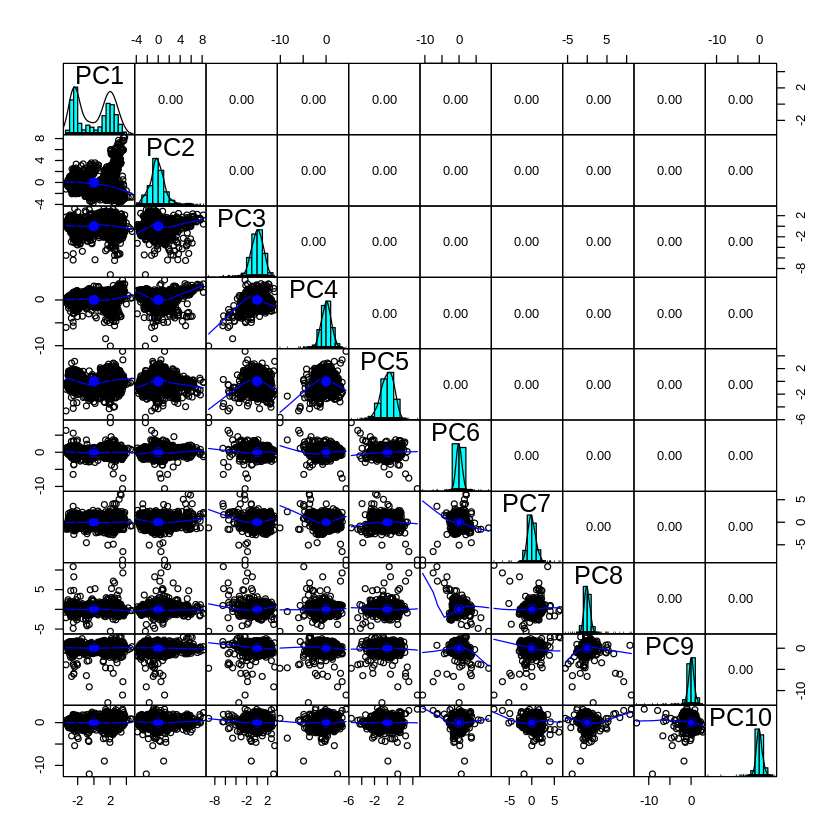

In [29]:
#install.packages("psych")
library(psych)
dim(dat.hsi)
head(dat.hsi[,3812:3831])
pc <- prcomp(dat.hsi[,c(3812:3831)],
             center = TRUE,
            scale. = TRUE)
attributes(pc)
summary(pc)
pcsc=data.frame(unitid=dat.hsi$unitid,year=dat.hsi$year,hsi_code=dat.hsi$hsi_code,hsi_stem_code=dat.hsi$hsi_stem_code,excellencia_hsi_status=dat.hsi$excellencia_hsi_status,DoE=dat.hsi$DoE,pc$x[,1:10])
head(pcsc)


plt=pairs.panels(pc$x[,1:10],
             gap=0,
             bg = c("red", "yellow", "blue")[dat.hsi$excellencia_hsi_status],
             pch=21)

jpeg("pairs.jpeg")
plt
dev.off()

In [30]:
pc17=pcsc[pcsc$year==2017,]
pc18=pcsc[pcsc$year==2018,]
pc19=pcsc[pcsc$year==2019,]
pc20=pcsc[pcsc$year==2020,]
pc21=pcsc[pcsc$year==2021,]
dim(pc17);dim(pcsc)

[1] 365  16

[1] 2147   16

2 : * * *
3 : * * *
4 : * * *
5 : * * *
2 : * * *
3 : * * *
4 : * * *
5 : * * *


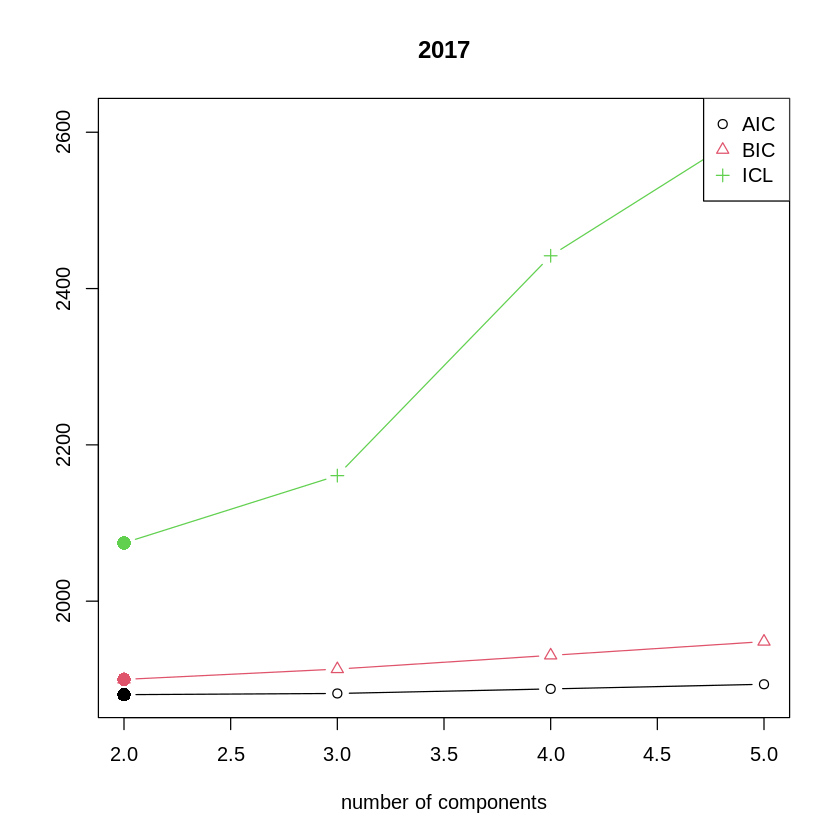

2 : * * *
3 : * * *
4 : * * *
5 : * * *


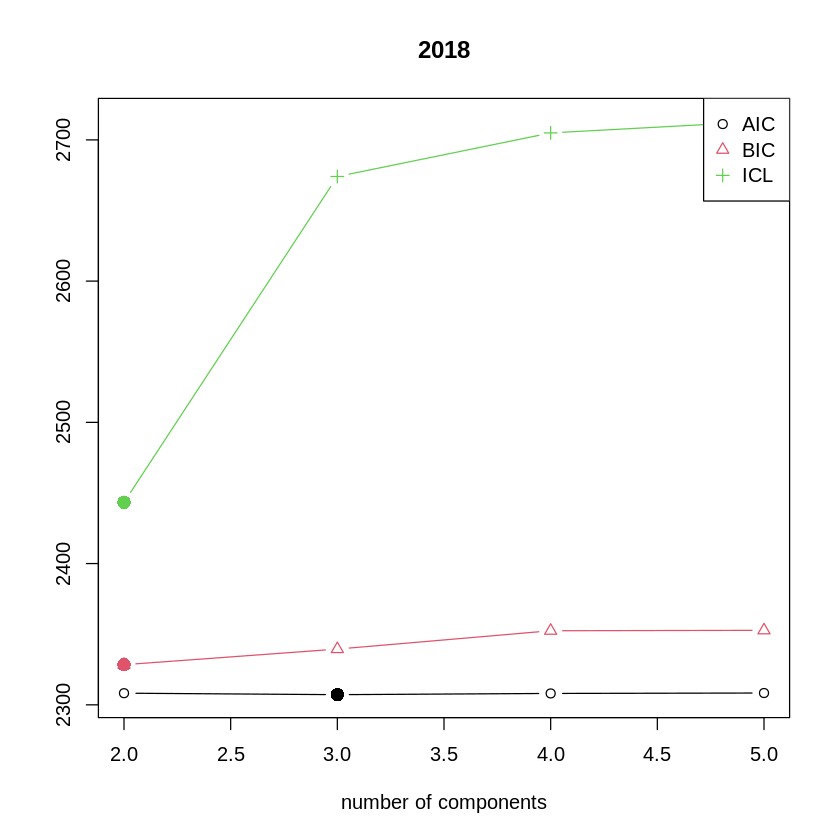

2 : * * *
3 : * * *
4 : * * *
5 : * * *


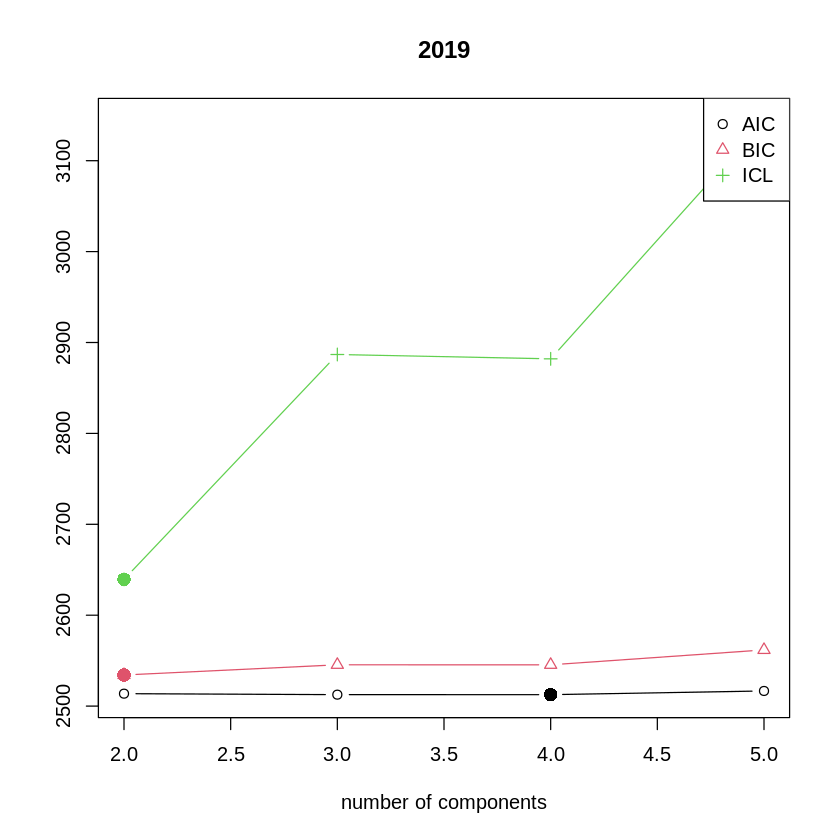

2 : * * *
3 : * * *
4 : * * *
5 : * * *


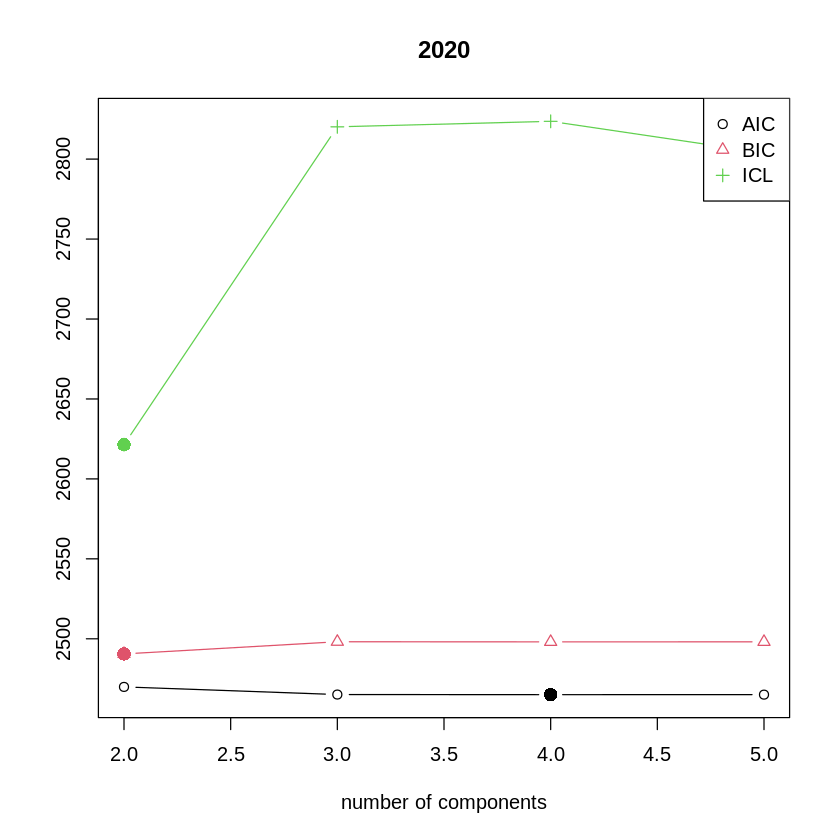

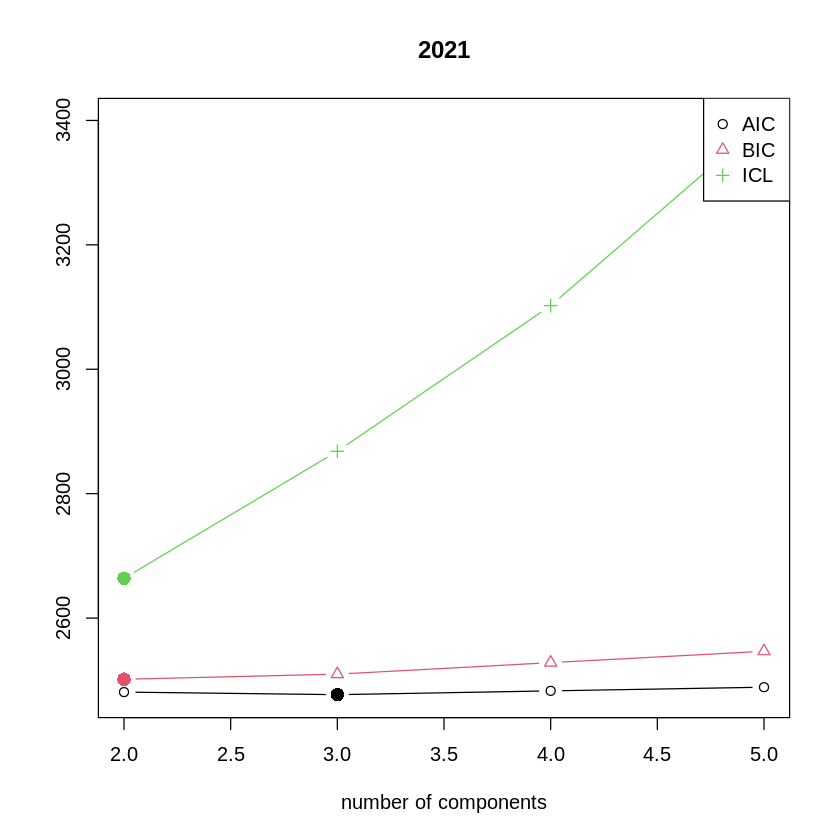

In [31]:
gmm2017 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc17, k = 2:5, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc18, k = 2:5, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc19, k = 2:5, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc20, k = 2:5, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

gmm2021 <- stepFlexmix(PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 ~ 1 | unitid, data = pc21, k = 2:5, model = FLXMRglm())
plot(gmm2021,main="2021") # Visualize BIC/ICL values